In [1]:
print("hi")

hi


In [7]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load your global AQI dataset
df = pd.read_csv("global_air_pollution_dataset.csv")
df.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [8]:
# Basic info
df.info()

# Column names
df.columns.tolist()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [9]:
# Strip whitespace, title case cities and countries
df['City'] = df['City'].astype(str).str.strip().str.title()
df['Country'] = df['Country'].astype(str).str.strip().str.title()

# Convert AQI to numeric, coerce errors to NaN (if any non-numeric found)
df['AQI Value'] = pd.to_numeric(df['AQI Value'], errors='coerce')

# Drop rows where AQI is missing
df = df.dropna(subset=['AQI Value'])


C:\Users\jites\AppData\Local\Temp\ipykernel_26024\2232288122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI Category', order=df['AQI Category'].value_counts().index, palette='Spectral')


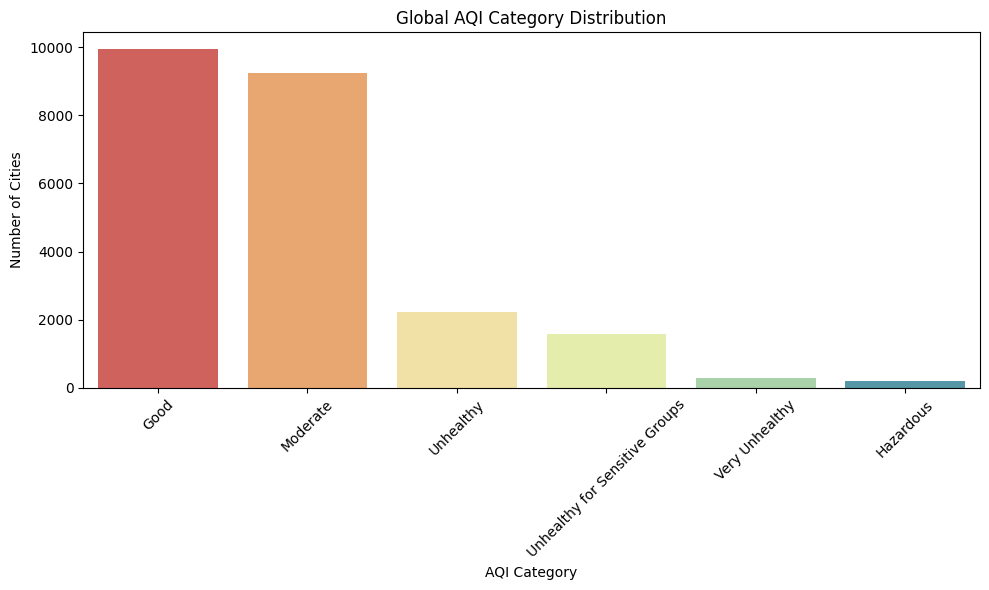

In [10]:
# Countplot for AQI categories
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='AQI Category', order=df['AQI Category'].value_counts().index, palette='Spectral')
plt.title("Global AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Number of Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


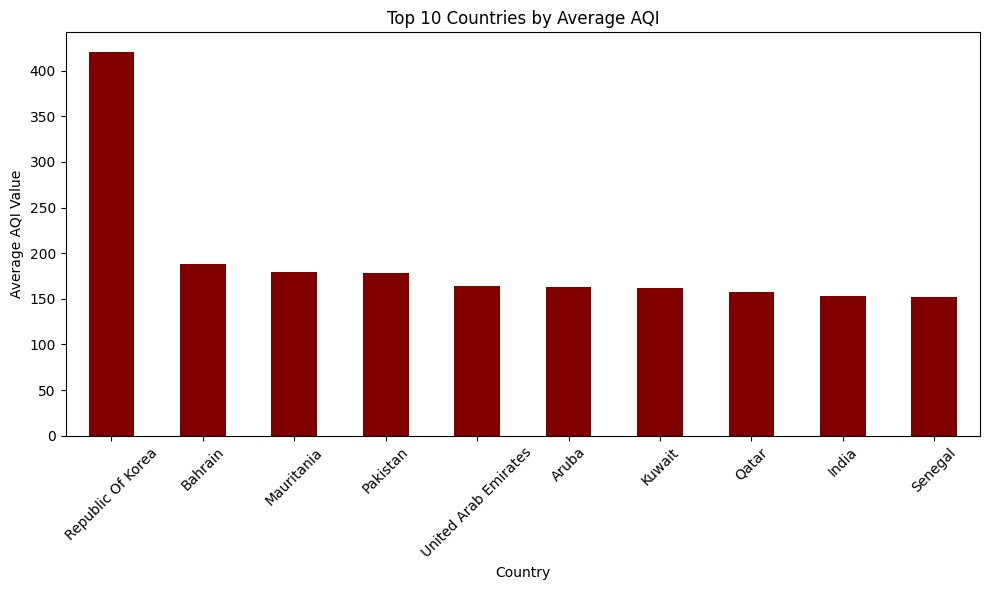

In [11]:
top_avg_aqi = df.groupby("Country")["AQI Value"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_avg_aqi.plot(kind='bar', color='maroon')
plt.title("Top 10 Countries by Average AQI")
plt.ylabel("Average AQI Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
top_cities = df[['City', 'Country', 'AQI Value']].sort_values(by='AQI Value', ascending=False).head(10)
top_cities.reset_index(drop=True)


,City,Country,AQI Value
0,Bisalpur,India,500
1,Ujhani,India,500
2,Jodhpur,India,500
3,Kanina,India,500
4,Delhi,India,500
5,Durango,United States Of America,500
6,Nohar,India,500
7,Chhachhrauli,India,500
8,Sisauli,India,500
9,Phalodi,India,500


In [14]:
import pandas as pd

# Load your air pollution dataset
aqi_df = pd.read_csv("global_air_pollution_dataset.csv")

# Load city coordinates (downloaded from simplemaps.com)
coords_df = pd.read_csv("worldcities.csv")

# Normalize names
aqi_df['City'] = aqi_df['City'].astype(str).str.strip().str.title()
aqi_df['Country'] = aqi_df['Country'].astype(str).str.strip().str.title()

coords_df['city'] = coords_df['city'].astype(str).str.strip().str.title()
coords_df['country'] = coords_df['country'].astype(str).str.strip().str.title()

# Merge on City and Country
merged_df = pd.merge(aqi_df, coords_df, how='left',
                     left_on=['City', 'Country'],
                     right_on=['city', 'country'])

# Rename and clean
merged_df = merged_df.rename(columns={"lat": "Latitude", "lng": "Longitude"})
merged_df = merged_df.dropna(subset=["Latitude", "Longitude"])

# Save for Flask app
merged_df.to_csv("global_aqi_with_coords.csv", index=False)
print("✅ Merged and saved as global_aqi_with_coords.csv")


✅ Merged and saved as global_aqi_with_coords.csv
